Перетворений DataFrame:
      User ID  Device Model  Operating System  App Usage Time (min/day)  \
0          1             0                 0                       393   
1          2             1                 0                       268   
2          3             3                 0                       154   
3          4             0                 0                       239   
4          5             4                 1                       187   
..       ...           ...               ...                       ...   
695      696             4                 1                        92   
696      697             3                 0                       316   
697      698             0                 0                        99   
698      699             2                 0                        62   
699      700             1                 0                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         

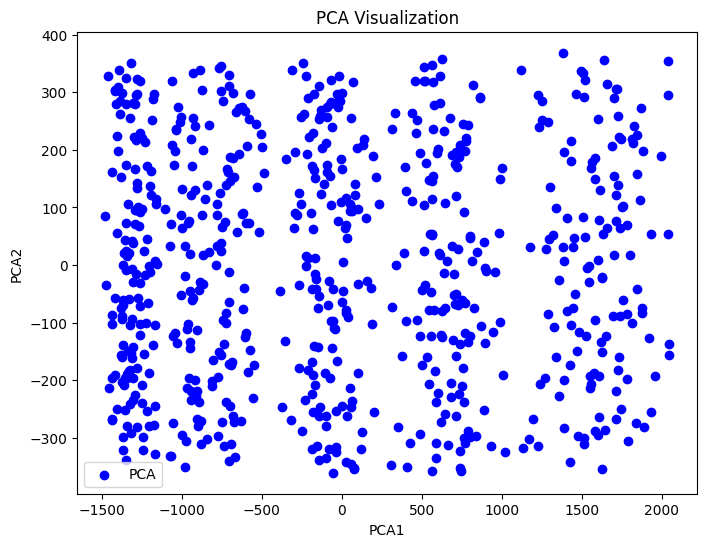

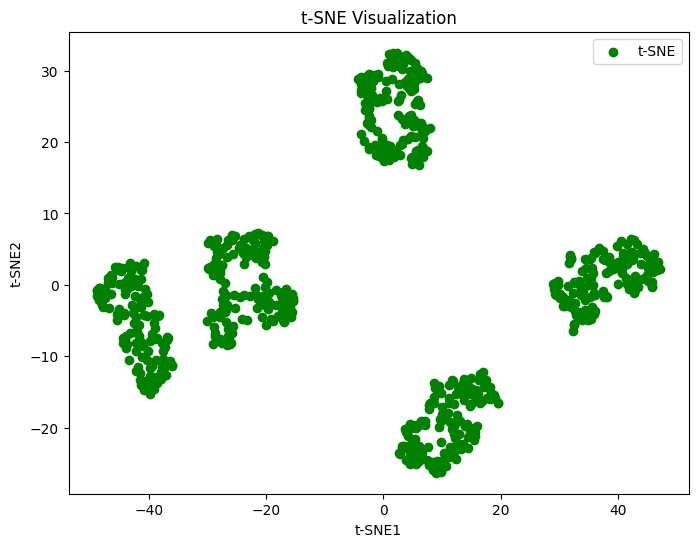

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Завантаження даних
file_path = r'C:\Users\User\Desktop\user_behavior_dataset.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data)

# Кодування текстових (категорійних) стовпців за допомогою LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Перевірка, що всі стовпці числові
print("Перетворений DataFrame:\n", df)

# Застосування PCA для зниження розмірності до 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print(pca.components_)
print(sum(pca.explained_variance_ratio_))

# Візуалізація результатів PCA
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c='blue', label='PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.legend()
plt.show()

# Застосування t-SNE для зниження розмірності до 2D
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df.drop(['PCA1', 'PCA2'], axis=1))  # Забираємо додані колонки PCA1 і PCA2
df['t-SNE1'] = tsne_result[:, 0]
df['t-SNE2'] = tsne_result[:, 1]

# Візуалізація результатів t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(df['t-SNE1'], df['t-SNE2'], c='green', label='t-SNE')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()


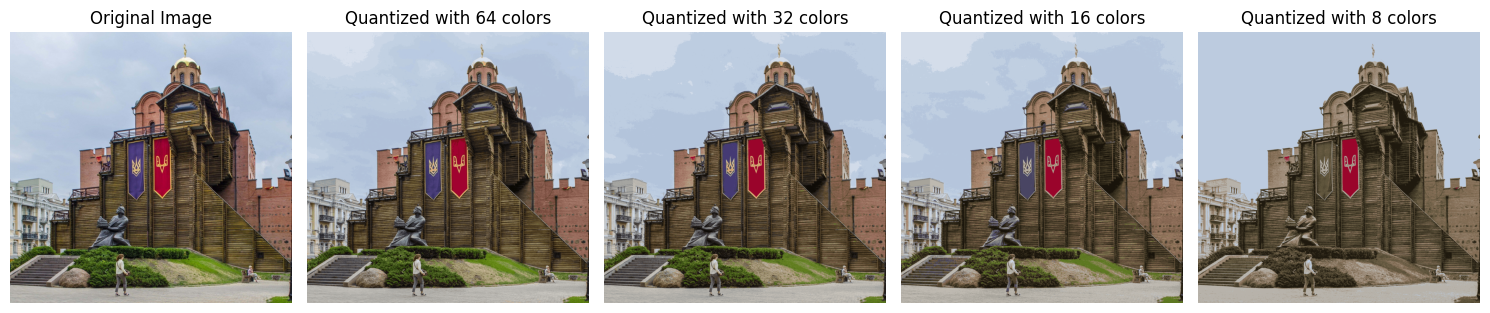

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io

# Завантаження зображення
image = io.imread(r'C:\Users\User\Desktop\zoloti_vorota.jpg')
image = image / 255.0  # Масштабування значень до діапазону [0, 1]

# Функція для квантування зображення з вказаною кількістю кольорів
def quantize_image(image, num_colors):
    # Перетворення зображення у 2D-матрицю (пікселі як рядки)
    pixels = image.reshape(-1, 3)
    # Застосування K-means для квантування
    kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]
    # Відновлення зображення
    quantized_image = new_colors.reshape(image.shape)
    return quantized_image

# Встановлення рівнів кольорів
color_levels = [64, 32, 16, 8]

# Створення графіка для відображення результатів
fig, axes = plt.subplots(1, len(color_levels) + 1, figsize=(15, 6))

# Відображення оригінального зображення
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Відображення квантування для кожного рівня кольорів
for i, level in enumerate(color_levels):
    quantized_image = quantize_image(image, level)
    axes[i + 1].imshow(quantized_image)
    axes[i + 1].set_title(f"Quantized with {level} colors")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


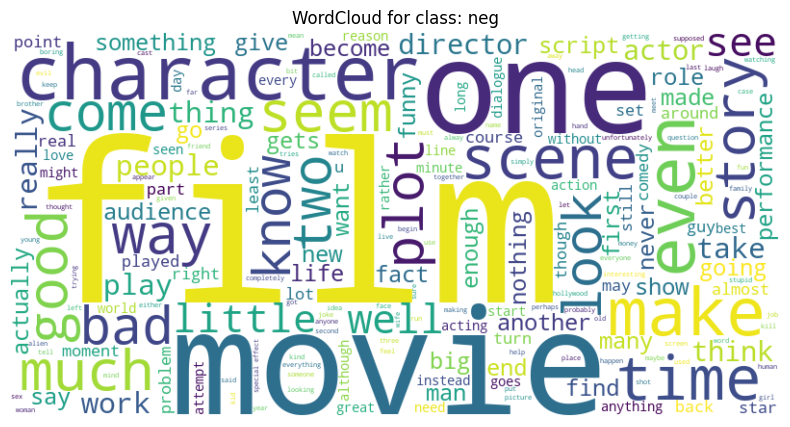

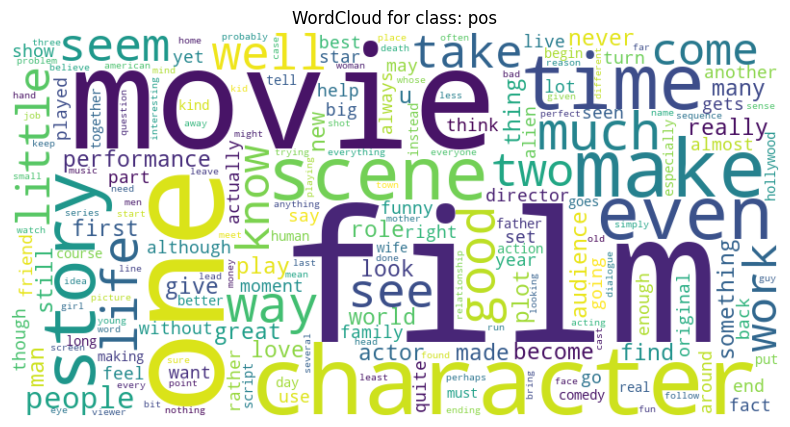

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         neg       0.78      0.83      0.81       302
         pos       0.82      0.77      0.79       298

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



In [15]:
import nltk
from nltk.corpus import movie_reviews
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Завантаження необхідних ресурсів
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

# Завантаження датасету
texts = [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]
df = pd.DataFrame({'text': texts, 'class': labels})

# Передобробка тексту
def preprocess_text(text):
    # Токенізація
    tokens = word_tokenize(text.lower())
    # Видалення пунктуації
    tokens = [word for word in tokens if word.isalnum()]
    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

# Візуалізація WordCloud для кожного класу
classes = df['class'].unique()
for label in classes:
    text = ' '.join(df[df['class'] == label]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for class: {label}')
    plt.axis('off')
    plt.show()

# Векторизація тексту
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['class']

# Розділення даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Класифікація з використанням Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

